In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [216]:
def show_plot(x, y=None, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    if np.all(y) == None:
        plt.plot(x)
    else:
        plt.plot(x, y)
    plt.grid()
    plt.show()

ввести данные из файлов соответствующих варианту задания, и сохранить их
в векторах х1 и х2 (функция waveread);

In [217]:
fs1, x1 = wavfile.read('audio/TA0.wav')
fs2, x2 = wavfile.read('audio/TA50.wav')

fs1, fs2

(22050, 22050)

путем просмотра речевых сигналов выбрать вокализованные и невокализованные участки х1 и х2

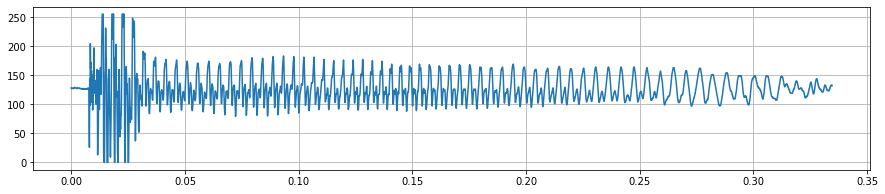

In [218]:
t1 = np.arange(0, len(x1)/fs1, 1/fs1)

show_plot(t1, x1, figsize=(15, 3))

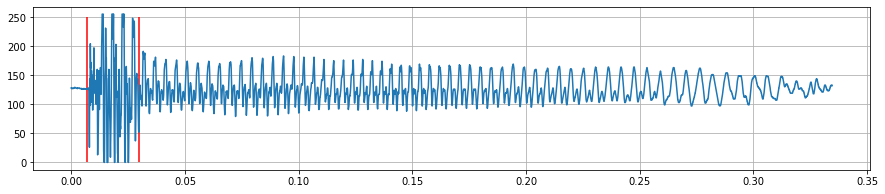

In [219]:
plt.figure(figsize=(15, 3))
plt.plot(t1, x1)
plt.vlines([0.007, 0.03], 0, 250, color='r')
plt.grid()
plt.show()

In [220]:
x1 = x1[659:]
t1 = t1[659:]

# show_plot(t1, x1)

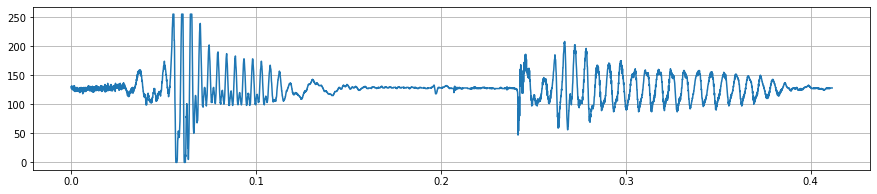

In [221]:
t2 = np.arange(0, len(x2)/fs2, 1/fs2)

show_plot(t2, x2, figsize=(15, 3))

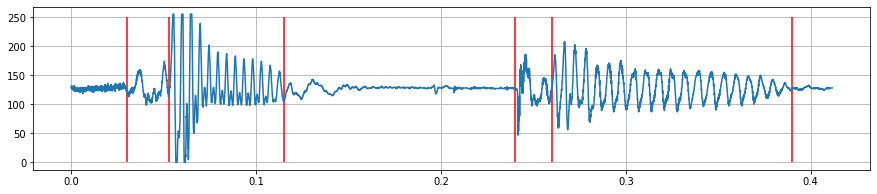

In [222]:
plt.figure(figsize=(15, 3))
plt.plot(t2, x2)
plt.vlines([0.03, 0.053, 0.115, 0.24, 0.26, 0.39], 0, 250, color='r')
plt.grid()
plt.show()

In [223]:
x2 = x2[5288:]
t2 = t2[5288:]

выполнить кратковременный узкополосный и широкополосный анализ участков х1 и х2, построить графики соответствующих реализаций и логарифмов модулей их спектров

In [224]:
N = 1024

In [225]:
1024/fs1

0.046439909297052155

In [226]:
spec_dw1_1024 = abs(np.fft.fft(x1, N))
t1 = t1[:N]

In [227]:
fff1 = np.arange(0, fs1, fs1/len(t1))

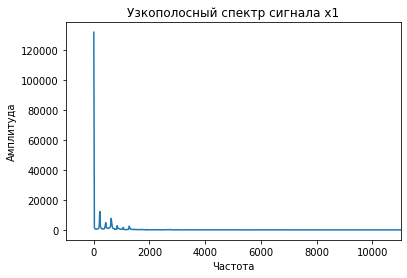

In [228]:
plt.plot(fff1[:N], spec_dw1_1024)
plt.title('Узкополосный спектр сигнала x1')
plt.xlim(-1000, fs1/2)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

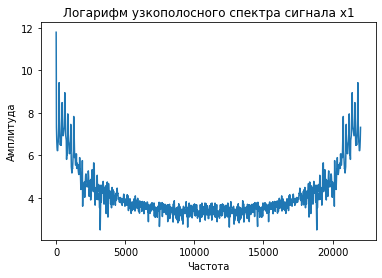

In [229]:
plt.plot(fff1[:N], np.log(spec_dw1_1024))
plt.title('Логарифм узкополосного спектра сигнала x1')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [230]:
N = 64

In [231]:
spec_dw1_64 = abs(np.fft.fft(x1, 64))
t1 = t1[:N]

In [232]:
fff1 = np.arange(0, fs1, fs1/len(t1))

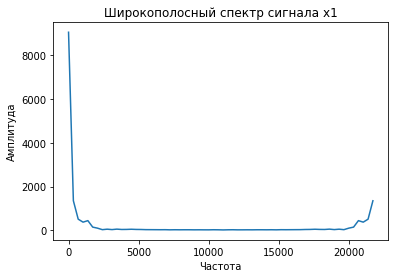

In [233]:
plt.plot(fff1[:N], spec_dw1_64)
plt.title('Широкополосный спектр сигнала x1')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

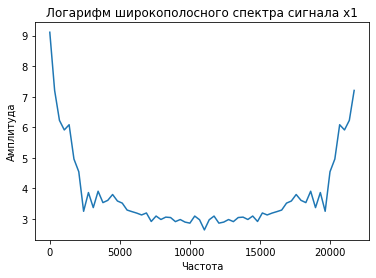

In [234]:
plt.plot(fff1, np.log(spec_dw1_64))
plt.title('Логарифм широкополосного спектра сигнала x1')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [235]:
N = 1024

In [236]:
spec_dw2_1024 = abs(np.fft.fft(x2, N))
t2 = t2[:N]

In [237]:
fff2 = np.arange(0, fs2, fs2/len(t2))

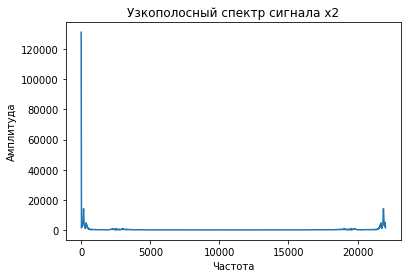

In [238]:
plt.plot(fff2, spec_dw2_1024)
plt.title('Узкополосный спектр сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

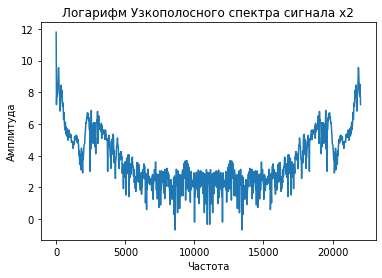

In [239]:
plt.plot(fff2, np.log(spec_dw2_1024))
plt.title('Логарифм Узкополосного спектра сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [240]:
N = 64

In [241]:
spec_dw2_64 =  abs(np.fft.fft(x2, N))
t2 = t2[:N]

In [242]:
fff2 = np.arange(0, fs2, fs2/len(t2))

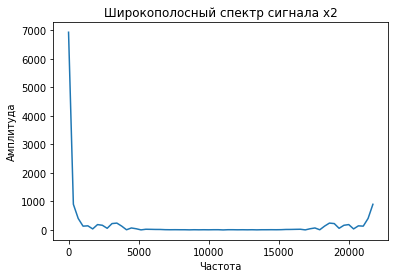

In [243]:
plt.plot(fff2, spec_dw2_64)
plt.title('Широкополосный спектр сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

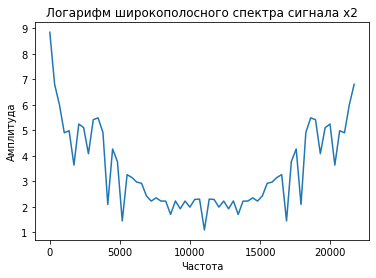

In [244]:
plt.plot(fff2, np.log(spec_dw2_64))
plt.title('Логарифм широкополосного спектра сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

по результатам спектрального анализа определить частоту основного тона,
пользуясь (6.3) (R=5). Построить график Pl(ω);

In [245]:
R = 5
N = len(spec_dw1_1024)
P1 = spec_dw1_1024 

for r in range(2, R + 1):
    index = np.arange(1, N, r)
    dec = spec_dw1_1024[index]
    P1 = P1[:len(dec)] * dec

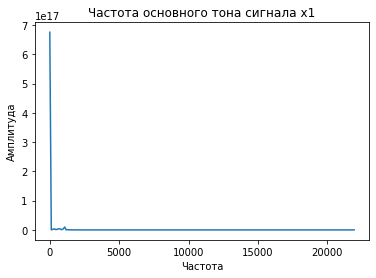

In [246]:
fff1 = np.arange(0, fs1, fs1/len(P1))
plt.plot(fff1, P1)
# plt.xlim(-1000, 3000)
plt.title('Частота основного тона сигнала x1')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [247]:
R = 5
N = len(spec_dw2_1024)
P2 = spec_dw2_1024 

for r in range(2, R + 1):
    index = np.arange(1, N, r)
    dec = spec_dw2_1024[index]
    P2 = P2[:len(dec)] * dec

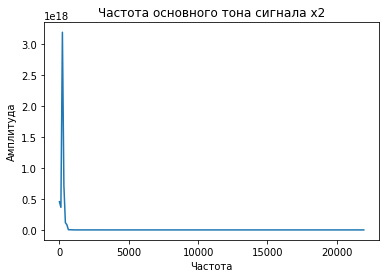

In [248]:
fff2 = np.arange(0, fs2, fs2/len(P2))
plt.plot(fff2, P2)
plt.title('Частота основного тона сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

построить спектрограммы речевых процессов х1 и х2.

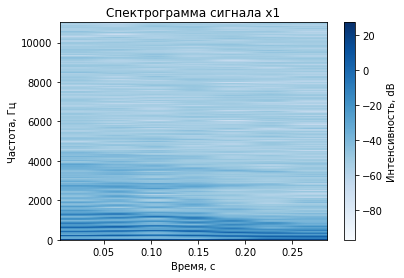

In [249]:
N = 1024

plt.specgram(x1, NFFT=N, Fs=fs1, 
        window=lambda data: data * np.hamming(len(data)), noverlap=int(N/8), cmap=plt.cm.Blues)
plt.colorbar().set_label('Интенсивность, dB')
plt.title('Спектрограмма сигнала x1')
plt.xlabel('Время, с')
plt.ylabel('Частота, Гц')
plt.show()

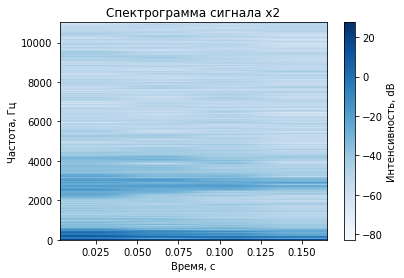

In [250]:
N = 1024

plt.specgram(x2, NFFT=N, Fs=fs2, 
        window=lambda data: data * np.hamming(len(data)), noverlap=int(N/8), cmap = plt.cm.Blues)
plt.colorbar().set_label('Интенсивность, dB')
plt.title('Спектрограмма сигнала x2')
plt.xlabel('Время, с')
plt.ylabel('Частота, Гц')
plt.show()

---

2. Выполнить гомоморфный анализ речи:
- для фрагментов речи х1 и х2 выполнить обработку по схеме, представленной на рис. 6.5;
- представить на графиках процессы в точках А, В, С, D, E;


In [251]:
fs1, x1 = wavfile.read('audio/TA0.wav')

x1 = x1[3310:(3310+1024)]

N = len(x1)
w = scipy.signal.hamming(N)

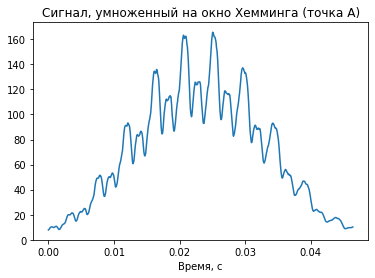

In [252]:
dw1 = x1 * w
t1 = np.arange(0, N/fs1, 1/fs1)
t1 = t1[:N]

plt.plot(t1, dw1)
plt.title('Сигнал, умноженный на окно Хемминга (точка A)')
plt.xlabel('Время, с')
plt.show()

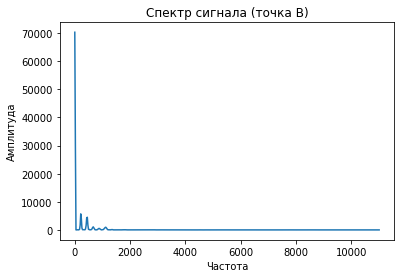

In [253]:
fff1 = np.arange(0, fs1, fs1/len(t1))
spec_dw1 = abs(np.fft.fft(dw1))

l1 = int(len(fff1)/2)

plt.plot(fff1[:l1], spec_dw1[:l1])
plt.title('Спектр сигнала (точка B)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

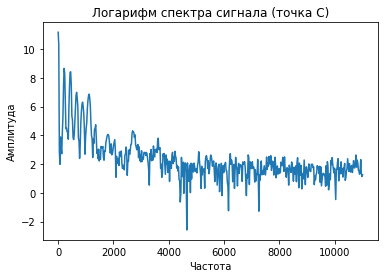

In [254]:
log_spec_dw1 = np.log(spec_dw1)

plt.plot(fff1[:l1], log_spec_dw1[:l1])
plt.title('Логарифм спектра сигнала (точка C)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

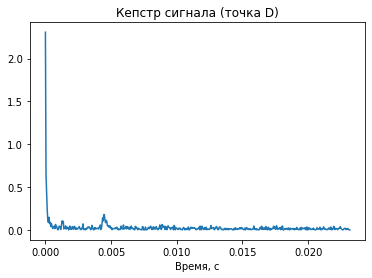

In [255]:
kepstr1 = abs(np.fft.ifft(log_spec_dw1))

plt.plot(t1[:l1], kepstr1[:l1])
plt.title('Кепстр сигнала (точка D)')
plt.xlabel('Время, с')
plt.show()

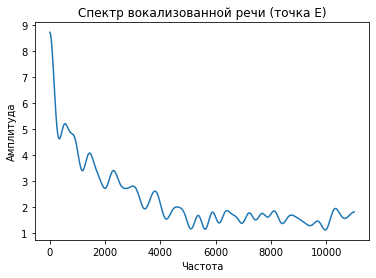

In [256]:
kw1 = kepstr1
kw1[int(len(kw1)/20):int(19 * len(kw1)/20)] = 0

spec_kw1 = abs(np.fft.fft(kw1))

plt.plot(fff1[:l1], spec_kw1[:l1])
plt.title('Спектр вокализованной речи (точка E)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

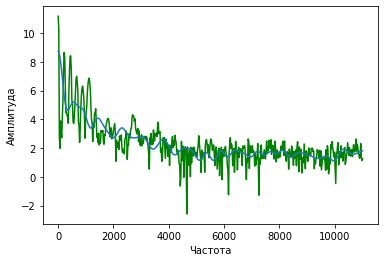

In [259]:
plt.plot(fff1[:l1], log_spec_dw1[:l1], color='g')
plt.plot(fff1[:int(len(fff1)/2)], spec_kw1[:int(len(fff1)/2)])
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

- определить по кепстру частоту основного тона.

In [260]:
R = 5
N = len(spec_kw1)
P1 = spec_kw1

for r in range(2, R + 1):
    index = np.arange(1, N, r)
    dec = spec_kw1[index]
    P1 = P1[:len(dec)] * dec

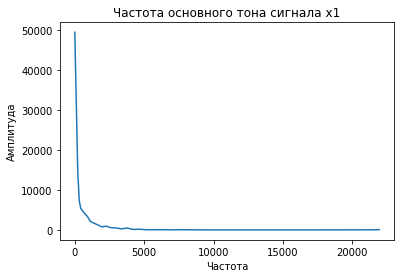

In [261]:
fff1 = np.arange(0, fs1, fs1/len(P1))
plt.plot(fff1, P1)
# plt.xlim(-1000, 3000)
plt.title('Частота основного тона сигнала x1')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [262]:
fs2, x2 = wavfile.read('audio/TA50.wav')

x2 = x2[6615:(6615+1024)]

N = len(x2)
w = scipy.signal.hamming(N)

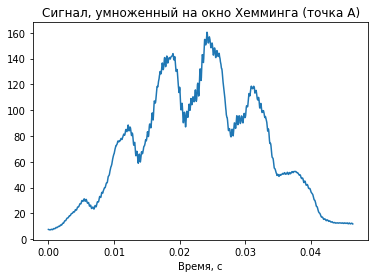

In [263]:
dw2 = x2 * w
t2 = np.arange(0, len(x2)/fs2, 1/fs2)

plt.plot(t2, dw2)
plt.title('Сигнал, умноженный на окно Хемминга (точка A)')
plt.xlabel('Время, с')
plt.show()

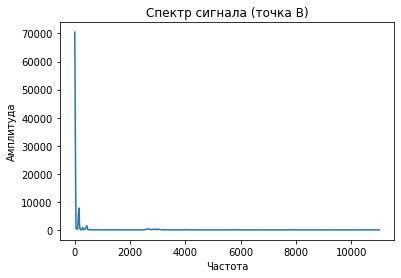

In [264]:
fff2 = np.arange(0, fs2, fs2/len(t2))
spec_dw2 = abs(np.fft.fft(dw2))

l2 = int(len(fff2)/2)

plt.plot(fff2[:l2], spec_dw2[:l2])
plt.title('Спектр сигнала (точка B)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

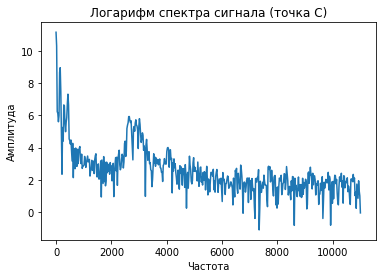

In [265]:
log_spec_dw2 = np.log(spec_dw2)

plt.plot(fff2[:l2], log_spec_dw2[:l2])
plt.title('Логарифм спектра сигнала (точка C)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

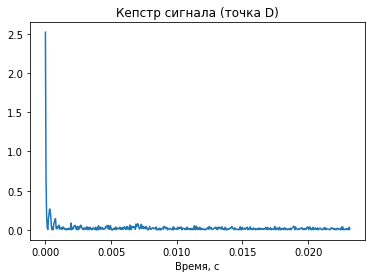

In [266]:
kepstr2 = abs(np.fft.ifft(log_spec_dw2))

plt.plot(t2[:l2], kepstr2[:l2])
plt.title('Кепстр сигнала (точка D)')
plt.xlabel('Время, с')
plt.show()

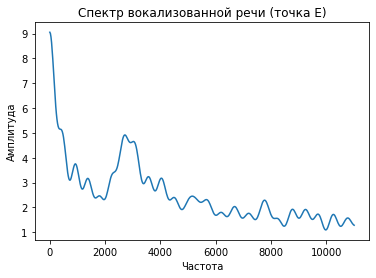

In [267]:
kw2 = kepstr2
kw2[int(len(kw2)/20):int(19*len(kw2)/20)] = 0

spec_kw2 = abs(np.fft.fft(kw2))

plt.plot(fff2[:l2], spec_kw2[:l2])
plt.title('Спектр вокализованной речи (точка E)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

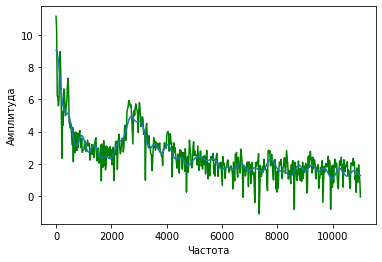

In [269]:
plt.plot(fff2[:l2], log_spec_dw2[:l2], color='g')
plt.plot(fff2[:l2], spec_kw2[:l2])
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

In [212]:
R = 5
N = len(spec_kw2)
P2 = spec_kw2

for r in range(2, R + 1):
    index = np.arange(1, N, r)
    dec = spec_kw2[index]
    P2 = P2[:len(dec)] * dec


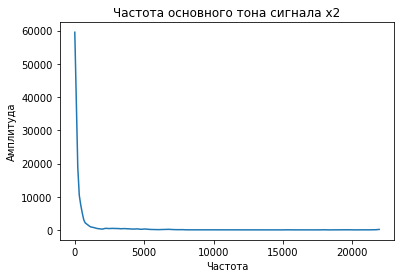

In [213]:
fff2 = np.arange(0, fs2, fs2/len(P2))
plt.plot(fff2, P2)
# plt.xlim(-1000, 3000)
plt.title('Частота основного тона сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

---

In [148]:
fs2, x2 = wavfile.read('audio/TA50.wav')

t2 = np.arange(0, len(x2)/fs2, 1/fs2)

In [149]:
x2 = x2[5300:5730] #0.24 - 0.26 # [3970:4850]
t2 = t2[5300:5730]

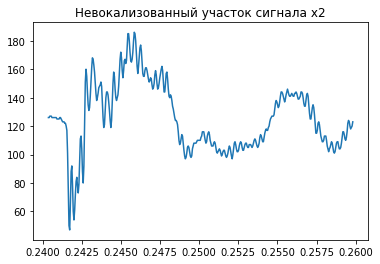

In [150]:
plt.plot(t2, x2)
plt.title('Невокализованный участок сигнала x2')
plt.show()

In [151]:
N = len(x2)
w = scipy.signal.hamming(N)

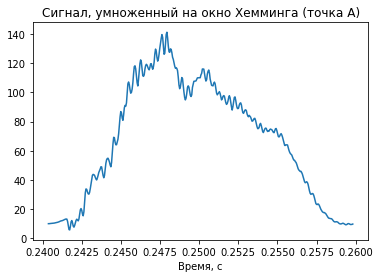

In [152]:
dw2 = x2 * w

plt.plot(t2, dw2)
plt.title('Сигнал, умноженный на окно Хемминга (точка A)')
plt.xlabel('Время, с')
plt.show()

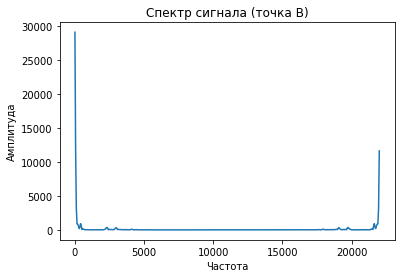

In [153]:
fff2 = np.arange(0, fs2, fs2/len(t2))
spec_dw2 = abs(np.fft.fft(dw2))

plt.plot(fff2[:l2], spec_dw2[:l2])
plt.title('Спектр сигнала (точка B)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

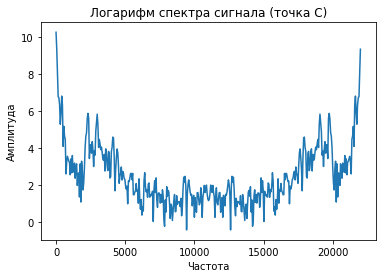

In [154]:
log_spec_dw2 = np.log(spec_dw2)

plt.plot(fff2[:l2], log_spec_dw2[:l2])
plt.title('Логарифм спектра сигнала (точка C)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

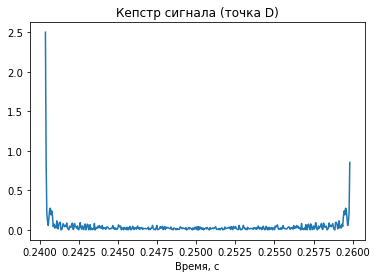

In [155]:
kepstr2 = abs(np.fft.ifft(log_spec_dw2))

plt.plot(t2[:l2], kepstr2[:l2])
plt.title('Кепстр сигнала (точка D)')
plt.xlabel('Время, с')
plt.show()

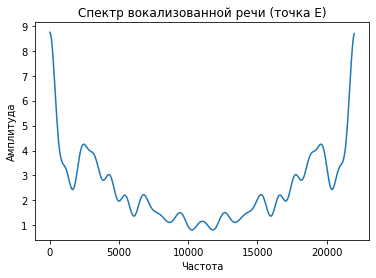

In [156]:
kw2 = kepstr2
kw2[int(len(kw2)/20):int(19 * len(kw2)/20)] = 0
spec_kw2 = abs(np.fft.fft(kw2))

plt.plot(fff2[:l2], spec_kw2[:l2])
plt.title('Спектр вокализованной речи (точка E)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

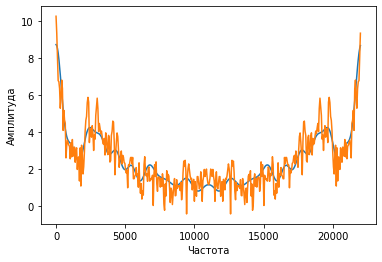

In [157]:
plt.plot(fff2[:l2], spec_kw2[:l2])
plt.plot(fff2[:l2], log_spec_dw2[:l2])
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

In [158]:
R = 5
N = len(spec_kw2)
P2 = spec_kw2

for r in range(2, R + 1):
    index = np.arange(1, N, r)
    dec = spec_kw2[index]
    P2 = P2[:len(dec)] * dec


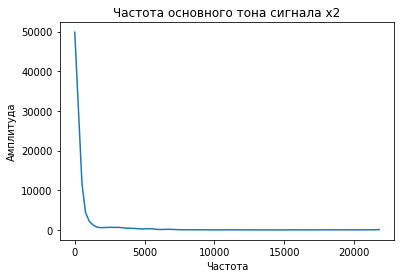

In [159]:
fff2 = np.arange(0, fs2, fs2/len(P2))
plt.plot(fff2, P2)
# plt.xlim(-1000, 3000)
plt.title('Частота основного тона сигнала x2')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()